In [1]:
# Basic set of Python Data Analysis
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.width',180)
pd.set_option('display.max_colwidth', 20)

## for plot by matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import animation
from IPython.display import HTML

from cycler import cycler
sns.set(font="DejaVu Sans", font_scale=1.8,
        rc={'figure.figsize':(10,10), 
            'lines.markersize':15, 
            "animation.embed_limit":100})
sns.mpl.rc("axes", prop_cycle=cycler('color',
        ['#E24A33', '#348ABD', '#988ED5', 
         '#777777', '#FBC15E', '#8EBA42',
         '#FFB5B8']))

## for markers
import itertools
marker = itertools.cycle(('o', 'v', '^','D', '+', 'X', '<', '>')) 
colors =  itertools.cycle(('#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8'))

## don't show warning
import warnings
warnings.filterwarnings('ignore')

## include mdtraj
import mdtraj as md

## set data directory
import os
pdbdir = os.path.expanduser('~') + "/data/gromacs/misc/pdb/"

In [5]:
t = md.load("/home/ghzuo/data/gromacs/data.Chignolin/5awl/unfolding/350.gro")

In [9]:
t.top.select("name == 'CA'")

array([  4,  25,  46,  66,  72,  87, 101, 108, 122, 146])

# AK Enzyme

In [13]:
datadir = pdbdir + "AK-Enzyme/inused/"

In [14]:
apo  = md.load(datadir + "AkEnzyme-4ake.pdb")
conts = md.compute_contacts(apo)
apoCM = pd.DataFrame(conts[1], columns=["X", "Y"])
apoCM['dist'] = conts[0].transpose()

In [15]:
holo = md.load(datadir + "AkEnzyme-1ake.pdb")
conts = md.compute_contacts(holo)
holoCM = pd.DataFrame(conts[1], columns=["X", "Y"])
holoCM['dist'] = conts[0].transpose()

In [16]:
## parameter for contact
cutoff = 0.5
CM = pd.merge(apoCM, holoCM, on=['X','Y'], how="outer").fillna(10.0)
CM = CM[(CM['dist_x']<cutoff) | (CM['dist_y']<cutoff)]

In [17]:
def contact(x):
    if(abs(x['dist_x'] - x['dist_y'])<0.2):
        return 'both'
    elif(x['dist_x'] < x['dist_y']):
        return 'apo'
    else:
        return 'holo'
    
    
CM['Contact'] = CM.apply(contact, axis=1)

[(-5.0, 218.0), (-5.0, 218.0)]

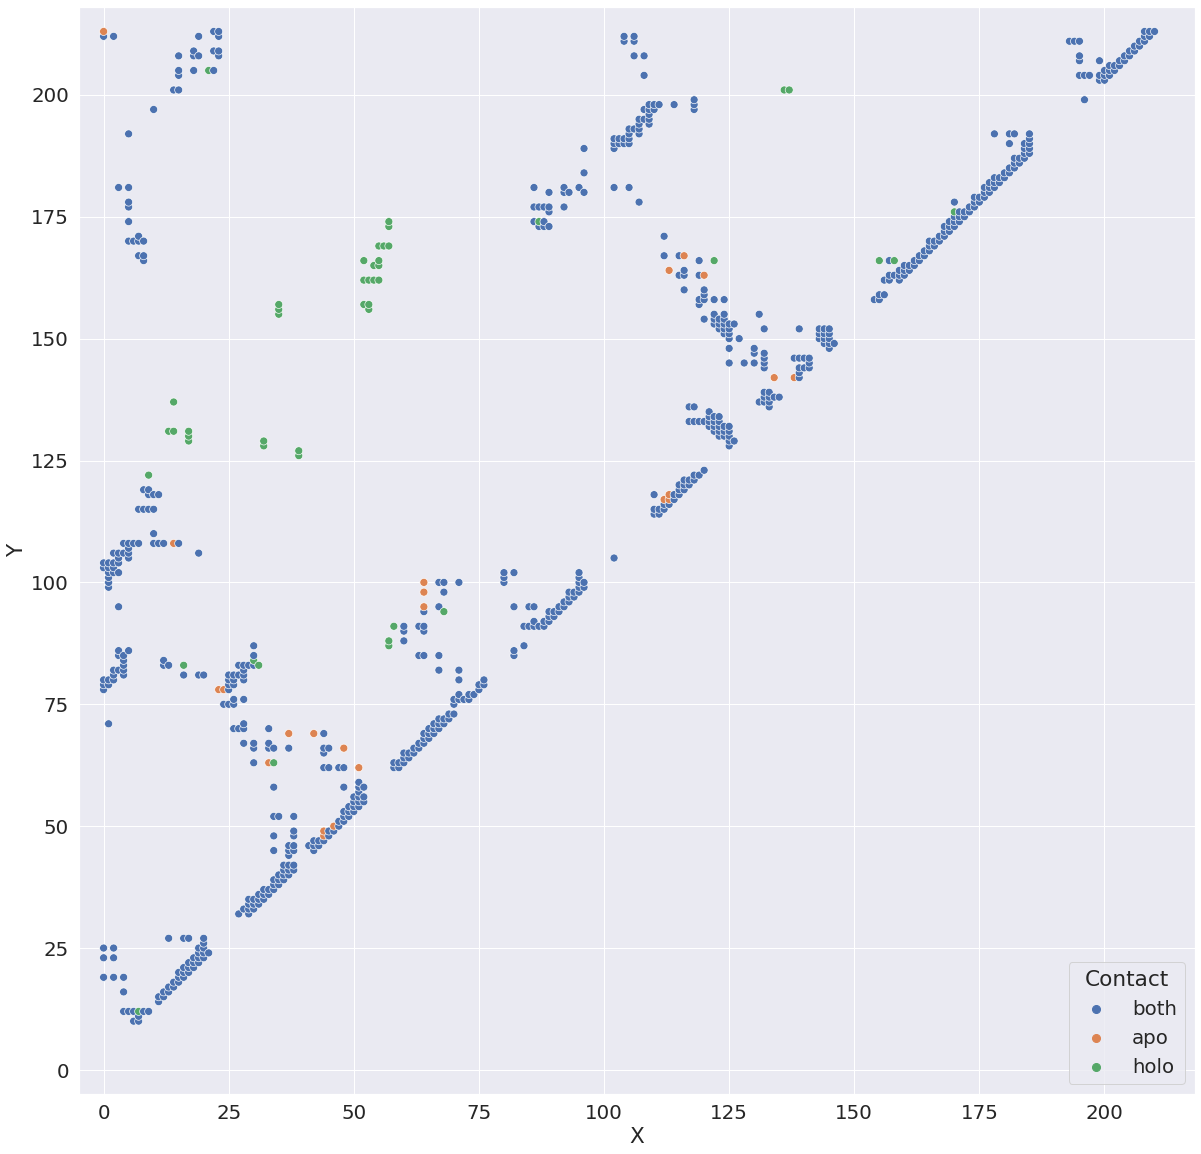

In [18]:
margin  = 5
maxndx = max(CM['Y']) + margin
out = CM
#out = CM[CM['Contact'].str.contains('apo|holo') ]
sns.set(font="DejaVu Sans", font_scale=1.8, 
            rc={'figure.figsize':(20,20), 
                'lines.markersize':8})
fig = sns.scatterplot(x="X", y="Y", hue='Contact', data=out)
fig.set(xlim=(-margin, maxndx),
        ylim=(-margin, maxndx)) 